In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import geopy.distance as gd
from IPython.display import display, HTML

In [383]:
#pip install geopy

## Import and Load Data

In [386]:
permits_main = pd.read_csv('../data/Residential_Short_Term_Rental_Permits_view_-4632427886711569466.csv')
#permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits_view_-4632427886711569466.csv',parse_dates = ['Date Entered','Date Issued','Expiration Date'])
permits_main.head(3)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,Address,City,State,Subdivision Lot,Permit Type,Permit SubType,...,Contact Mobile Phone #,Contact Work Phone #,Contact Work Phone Ext,Longitude,Latitude,ObjectId,Zip Code,Parcel,x,y
0,201511887,Short Term Rental - Non-Owner Occupied,4/1/2015 5:00:00 AM,7/9/2015 5:00:00 AM,133 HAYNES PARK DR,NASHVILLE,TN,LOT 187 HAYNES PARK SUB SEC 2,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.834922,36.209292,1,37218,06904012500,-9.666419e+06,4.329458e+06
1,201512342,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,1004 MANSFIELD ST,NASHVILLE,TN,S SIDE MANSFIELD ST E OF MCFERRIN AVE IN OLWIL...,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.752833,36.181426,2,37206,08208040200,-9.657281e+06,4.325614e+06
2,201512346,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,1027 DELMAS AVE,NASHVILLE,TN,PT LOT 3 EASTHILL SUB,CASR,CAZ10A002,...,NaN,NaN,NaN,-86.741508,36.199439,3,37216,07210009800,-9.656020e+06,4.328099e+06


In [486]:
# listings = pd.read_csv('../data/listings.csv',parse_dates = ['host_since'])
# listings.head(5)


In [12]:
# reviews  = pd.read_csv('../data/reviews.csv',parse_dates = ['date'])
# reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


## Rental permits Data Analysis

In [626]:
permits = permits_main[['Permit #','Permit Subtype Description','Date Entered','Date Issued','City','State','Council District','Expiration Date','Permit Status','Longitude','Latitude','ObjectId','Zip Code']]
permits.head(5)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,City,State,Council District,Expiration Date,Permit Status,Longitude,Latitude,ObjectId,Zip Code
0,201511887,Short Term Rental - Non-Owner Occupied,4/1/2015 5:00:00 AM,7/9/2015 5:00:00 AM,NASHVILLE,TN,1,8/8/2023 12:00:00 AM,EXPIRED,-86.834922,36.209292,1,37218
1,201512342,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,NASHVILLE,TN,5,4/6/2020 12:00:00 AM,EXPIRED,-86.752833,36.181426,2,37206
2,201512346,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,NASHVILLE,TN,5,4/7/2025 12:00:00 AM,ISSUED,-86.741508,36.199439,3,37216
3,201512348,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,NASHVILLE,TN,5,4/7/2025 12:00:00 AM,ISSUED,-86.741448,36.199481,4,37216
4,201512359,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,NASHVILLE,TN,5,4/6/2021 12:00:00 AM,EXPIRED,-86.747648,36.193169,5,37206


In [628]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    15484 non-null  object 
 1   Permit Subtype Description  15484 non-null  object 
 2   Date Entered                15484 non-null  object 
 3   Date Issued                 14173 non-null  object 
 4   City                        15483 non-null  object 
 5   State                       15483 non-null  object 
 6   Council District            15484 non-null  int64  
 7   Expiration Date             15480 non-null  object 
 8   Permit Status               15484 non-null  object 
 9   Longitude                   15484 non-null  float64
 10  Latitude                    15484 non-null  float64
 11  ObjectId                    15484 non-null  int64  
 12  Zip Code                    15484 non-null  int64  
dtypes: float64(2), int64(3), object

In [630]:
print(permits.columns.duplicated())

[False False False False False False False False False False False False
 False]


In [632]:
# permits by council districts 1-35
permits = permits[(permits['Council District'] <= 35) & (permits['City'] == 'NASHVILLE')]
permits

,Permit #,Permit Subtype Description,Date Entered,Date Issued,City,State,Council District,Expiration Date,Permit Status,Longitude,Latitude,ObjectId,Zip Code
0,201511887,Short Term Rental - Non-Owner Occupied,4/1/2015 5:00:00 AM,7/9/2015 5:00:00 AM,NASHVILLE,TN,1,8/8/2023 12:00:00 AM,EXPIRED,-86.834922,36.209292,1,37218
1,201512342,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,NASHVILLE,TN,5,4/6/2020 12:00:00 AM,EXPIRED,-86.752833,36.181426,2,37206
2,201512346,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,NASHVILLE,TN,5,4/7/2025 12:00:00 AM,ISSUED,-86.741508,36.199439,3,37216
3,201512348,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/7/2015 5:00:00 AM,NASHVILLE,TN,5,4/7/2025 12:00:00 AM,ISSUED,-86.741448,36.199481,4,37216
4,201512359,Short Term Rental - Non-Owner Occupied,4/6/2015 5:00:00 AM,4/6/2015 5:00:00 AM,NASHVILLE,TN,5,4/6/2021 12:00:00 AM,EXPIRED,-86.747648,36.193169,5,37206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,T2025004468,Short Term Rental – Multifamily,1/17/2025 6:00:00 AM,NaN,NASHVILLE,TN,19,4/17/2025 12:00:00 AM,PENDING,-86.776229,36.149515,16270,37203
15480,T2025004499,Short Term Rental – Multifamily,1/17/2025 6:00:00 AM,NaN,NASHVILLE,TN,19,4/17/2025 12:00:00 AM,PENDING,-86.776497,36.149672,16271,37203
15481,T2025004594,Short Term Rental – Multifamily,1/17/2025 6:00:00 AM,NaN,NASHVILLE,TN,2,4/17/2025 12:00:00 AM,PENDING,-86.779351,36.193158,16272,37207
15482,T2025004599,Short Term Rental – Multifamily,1/17/2025 6:00:00 AM,NaN,NASHVILLE,TN,19,4/17/2025 12:00:00 AM,PENDING,-86.776481,36.149619,16273,37203


In [704]:
permits['Permit #'] = permits['Permit #'].astype(str).str.replace('T','')
permits

,Permit #,Permit Subtype Description,Date Entered,Date Issued,City,State,Council District,Expiration Date,Permit Status,Longitude,...,ObjectId,Zip Code,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,NASHVILLE,TN,1,2023-08-08,EXPIRED,-86.834922,...,1,37218,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08,2015,2015,2023.0
1,201512342,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-06 05:00:00,NASHVILLE,TN,5,2020-04-06,EXPIRED,-86.752833,...,2,37206,2015-04-06,05:00:00,2015-04-06,05:00:00,2020-04-06,2015,2015,2020.0
2,201512346,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-07 05:00:00,NASHVILLE,TN,5,2025-04-07,ISSUED,-86.741508,...,3,37216,2015-04-06,05:00:00,2015-04-07,05:00:00,2025-04-07,2015,2015,2025.0
3,201512348,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-07 05:00:00,NASHVILLE,TN,5,2025-04-07,ISSUED,-86.741448,...,4,37216,2015-04-06,05:00:00,2015-04-07,05:00:00,2025-04-07,2015,2015,2025.0
4,201512359,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-06 05:00:00,NASHVILLE,TN,5,2021-04-06,EXPIRED,-86.747648,...,5,37206,2015-04-06,05:00:00,2015-04-06,05:00:00,2021-04-06,2015,2015,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,2025004468,Short Term Rental – Multifamily,2025-01-17 06:00:00,NaT,NASHVILLE,TN,19,2025-04-17,PENDING,-86.776229,...,16270,37203,2025-01-17,06:00:00,NaT,None,2025-04-17,2025,NaN,2025.0
15480,2025004499,Short Term Rental – Multifamily,2025-01-17 06:00:00,NaT,NASHVILLE,TN,19,2025-04-17,PENDING,-86.776497,...,16271,37203,2025-01-17,06:00:00,NaT,None,2025-04-17,2025,NaN,2025.0
15481,2025004594,Short Term Rental – Multifamily,2025-01-17 06:00:00,NaT,NASHVILLE,TN,2,2025-04-17,PENDING,-86.779351,...,16272,37207,2025-01-17,06:00:00,NaT,None,2025-04-17,2025,NaN,2025.0
15482,2025004599,Short Term Rental – Multifamily,2025-01-17 06:00:00,NaT,NASHVILLE,TN,19,2025-04-17,PENDING,-86.776481,...,16273,37203,2025-01-17,06:00:00,NaT,None,2025-04-17,2025,NaN,2025.0


In [707]:
listings_by_owner_types = permits.value_counts("Permit Subtype Description").reset_index(name = 'count')
listings_by_owner_types

,Permit Subtype Description,count
0,Short Term Rental – Multifamily,7838
1,Short Term Rental - Owner Occupied,5324
2,Short Term Rental - Non-Owner Occupied,1702


Text(0.5, 1.0, 'Count of Listings by Permit Subtype Description')

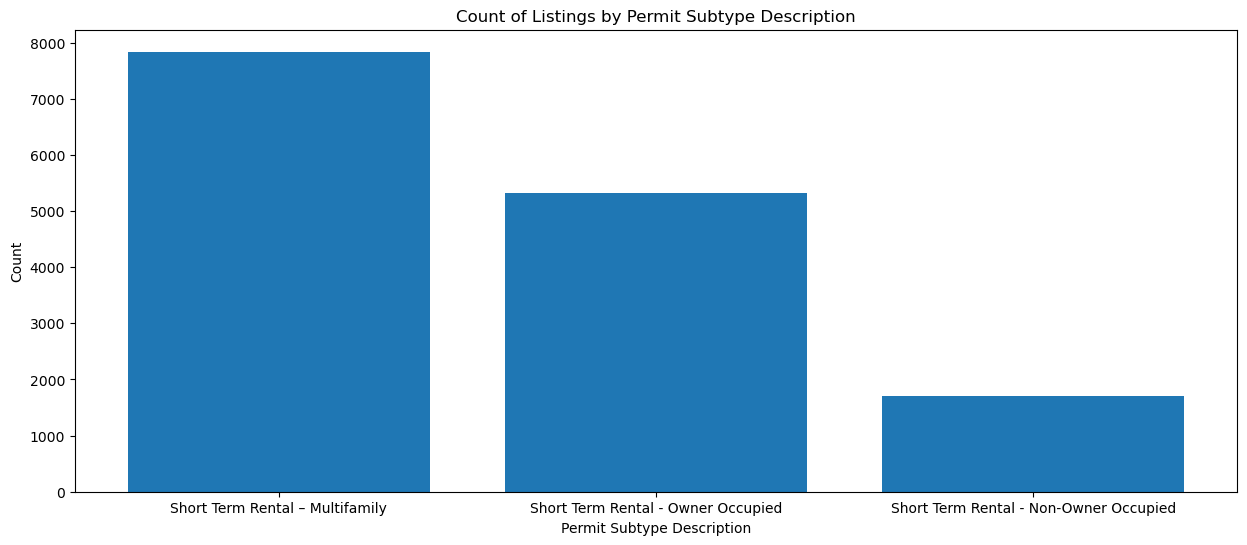

In [709]:
plt.figure(figsize=(15, 6))
plt.bar(listings_by_owner_types['Permit Subtype Description'], listings_by_owner_types['count'])
plt.xlabel('Permit Subtype Description')
plt.ylabel('Count')
plt.title('Count of Listings by Permit Subtype Description')


In [711]:
# sns.histplot(data = permits,x='Permit Subtype Description')
# plt.show()

In [714]:
#updating data type for date columns
permits['Date Entered'] = pd.to_datetime(permits['Date Entered'])
permits['Date Issued'] = pd.to_datetime(permits['Date Issued'])
permits['Expiration Date']= pd.to_datetime(permits['Expiration Date'])

In [717]:
# permits.dtypes

In [719]:
permits[['date applied','issued time']]= permits['Date Entered'].astype(str).str.split(' ',expand=True)
permits[['date approved','approved time']] = permits['Date Issued'].astype(str).str.split(' ',expand=True)
permits['date expired'] = permits['Expiration Date'].dt.date
#permits['date expired'] = permits['Expiration Date'].astype(str).str.split(' ',expand = True)
#9/6/2025 0:00
permits.head(1)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,City,State,Council District,Expiration Date,Permit Status,Longitude,...,ObjectId,Zip Code,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,NASHVILLE,TN,1,2023-08-08,EXPIRED,-86.834922,...,1,37218,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08,2015,2015,2023.0


In [721]:
# permits_split_exp = permits['Expiration Date'].astype(str).str.split(' ',expand = True)
# permits_split_exp


In [723]:
permits['date expired']= pd.to_datetime(permits['date expired'])

In [725]:
# permits.dtypes

In [727]:
permits['year applied'] = permits['Date Entered'].astype(str).str.extract(r'(\d{4})', expand=False)
permits['year issued'] = permits['Date Issued'].astype(str).str.extract(r'(\d{4})', expand = False)
permits['year expired']=permits['Expiration Date'].dt.year
#permits['year expired'] = permits['date expired'].astype(str).str.extract('r(\d{4})', expand = False)
#2023-08-08
permits.head(2)

,Permit #,Permit Subtype Description,Date Entered,Date Issued,City,State,Council District,Expiration Date,Permit Status,Longitude,...,ObjectId,Zip Code,date applied,issued time,date approved,approved time,date expired,year applied,year issued,year expired
0,201511887,Short Term Rental - Non-Owner Occupied,2015-04-01 05:00:00,2015-07-09 05:00:00,NASHVILLE,TN,1,2023-08-08,EXPIRED,-86.834922,...,1,37218,2015-04-01,05:00:00,2015-07-09,05:00:00,2023-08-08,2015,2015,2023.0
1,201512342,Short Term Rental - Non-Owner Occupied,2015-04-06 05:00:00,2015-04-06 05:00:00,NASHVILLE,TN,5,2020-04-06,EXPIRED,-86.752833,...,2,37206,2015-04-06,05:00:00,2015-04-06,05:00:00,2020-04-06,2015,2015,2020.0


In [729]:
# permits.info()

In [733]:
#1.a.total applications applied for rental permit  in nashville
total_applications_received_by_year = permits.groupby('year applied')['Permit #'].count().sort_values().reset_index(name='count')
total_applications_received_by_year

,year applied,count
0,2025,52
1,2020,901
2,2023,988
3,2024,1120
4,2015,1326
5,2021,1451
6,2016,1544
7,2017,1642
8,2022,1858
9,2018,1971


In [735]:
# 2.a. total type of applications overall nashville year wise
Type_of_permits_overall_year = permits.groupby(['year applied','Permit Subtype Description'])['Permit #'].count().reset_index(name = 'total count')
Type_of_permits_overall_year

,year applied,Permit Subtype Description,total count
0,2015,Short Term Rental - Non-Owner Occupied,655
1,2015,Short Term Rental - Owner Occupied,441
2,2015,Short Term Rental – Multifamily,230
3,2016,Short Term Rental - Non-Owner Occupied,595
4,2016,Short Term Rental - Owner Occupied,577
5,2016,Short Term Rental – Multifamily,372
6,2017,Short Term Rental - Non-Owner Occupied,237
7,2017,Short Term Rental - Owner Occupied,744
8,2017,Short Term Rental – Multifamily,661
9,2018,Short Term Rental - Non-Owner Occupied,126


In [737]:
# 2.b. total type of applications by city 
Type_of_permits_by_city = permits.groupby(['year applied','Council District','Permit Subtype Description'])['Permit #'].count().sort_values(ascending = False).reset_index(name = 'total count')
Type_of_permits_by_city

,year applied,Council District,Permit Subtype Description,total count
0,2022,19,Short Term Rental – Multifamily,714
1,2018,19,Short Term Rental – Multifamily,426
2,2019,19,Short Term Rental – Multifamily,300
3,2017,19,Short Term Rental – Multifamily,290
4,2021,19,Short Term Rental – Multifamily,221
...,...,...,...,...
538,2019,14,Short Term Rental – Multifamily,1
539,2019,16,Short Term Rental - Non-Owner Occupied,1
540,2019,24,Short Term Rental - Non-Owner Occupied,1
541,2019,26,Short Term Rental – Multifamily,1


In [739]:

# total_applications_received_by_city = permits.groupby('Council District')['Permit #'].count().sort_values(ascending=False).reset_index()
# total_applications_received_by_city

In [742]:
#status of application overall nashville
status_of_applications = permits.groupby('Permit Status')['Permit #'].count().sort_values(ascending=False).reset_index()
status_of_applications

,Permit Status,Permit #
0,ISSUED,6756
1,EXPIRED,6273
2,CANCELLED,1666
3,REVOKED,75
4,EXPIREEXT,46
5,PENDING,35
6,HOLD,9
7,REFUNDED,3
8,VOID,1


In [744]:
status_of_applications = permits.groupby(['year applied','Permit Status','Permit Subtype Description'])['Permit #'].count().sort_values(ascending=False).reset_index()
status_of_applications

,year applied,Permit Status,Permit Subtype Description,Permit #
0,2022,ISSUED,Short Term Rental – Multifamily,1093
1,2021,ISSUED,Short Term Rental – Multifamily,828
2,2024,ISSUED,Short Term Rental – Multifamily,742
3,2018,EXPIRED,Short Term Rental - Owner Occupied,581
4,2019,EXPIRED,Short Term Rental – Multifamily,571
...,...,...,...,...
122,2022,ISSUED,Short Term Rental - Non-Owner Occupied,1
123,2018,HOLD,Short Term Rental - Owner Occupied,1
124,2022,EXPIRED,Short Term Rental - Non-Owner Occupied,1
125,2019,REVOKED,Short Term Rental - Non-Owner Occupied,1


In [349]:
# by_end_of_2025 = permits[(permits["year expired"] == 2025.0)  & (permits["Permit Status"] == 'EXPIRED')]
# by_end_of_2025

## Airbnb Data 

In [488]:
listings = listings[['id','host_id','host_url','host_name','host_since','calculated_host_listings_count','neighbourhood_cleansed','latitude','longitude','price','room_type','minimum_nights','availability_365','accommodates']]
listings

,id,host_id,host_url,host_name,host_since,calculated_host_listings_count,neighbourhood_cleansed,latitude,longitude,price,room_type,minimum_nights,availability_365,accommodates
0,6422,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,1,District 6,36.171430,-86.735700,$43.00,Private room,30,50,1
1,39870,171184,https://www.airbnb.com/users/show/171184,Evelyn,2010-07-18,1,District 25,36.124660,-86.812690,$70.00,Private room,1,263,2
2,59576,812128,https://www.airbnb.com/users/show/812128,Patricia And John,2011-07-12,7,District 12,36.189400,-86.591620,$43.00,Private room,30,180,1
3,72906,176117,https://www.airbnb.com/users/show/176117,Richard,2010-07-21,1,District 18,36.131220,-86.800660,$80.00,Entire home/apt,2,85,2
4,258817,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,8,District 12,36.160760,-86.591510,$34.00,Private room,30,365,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,1315354286583160889,573913506,https://www.airbnb.com/users/show/573913506,Melissa,2024-04-23,1,District 32,36.039151,-86.623468,$40.00,Private room,14,309,2
9402,1315525511696474960,79796943,https://www.airbnb.com/users/show/79796943,Alan,2016-06-25,1,District 10,36.370881,-86.729103,$92.00,Entire home/apt,2,363,4
9403,1316126194466441067,85360355,https://www.airbnb.com/users/show/85360355,StayLocal,2016-07-22,134,District 5,36.195711,-86.775330,$199.00,Entire home/apt,1,334,16
9404,1316141524804521317,85360355,https://www.airbnb.com/users/show/85360355,StayLocal,2016-07-22,134,District 5,36.196198,-86.773752,$199.00,Entire home/apt,1,325,16


In [599]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              9406 non-null   int64         
 1   host_id                         9406 non-null   int64         
 2   host_url                        9406 non-null   object        
 3   host_name                       9406 non-null   object        
 4   host_since                      9406 non-null   datetime64[ns]
 5   calculated_host_listings_count  9406 non-null   int64         
 6   neighbourhood_cleansed          9406 non-null   object        
 7   latitude                        9406 non-null   float64       
 8   longitude                       9406 non-null   float64       
 9   price                           9406 non-null   int32         
 10  room_type                       9406 non-null   object        
 11  mini

In [492]:
listings.isna().sum()

id                                   0
host_id                              0
host_url                             0
host_name                            0
host_since                           0
calculated_host_listings_count       0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
price                             2863
room_type                            0
minimum_nights                       0
availability_365                     0
accommodates                         0
dtype: int64

In [498]:
# listings.describe()

In [589]:
listings.query('price == 0').count()

id                                2864
host_id                           2864
host_url                          2864
host_name                         2864
host_since                        2864
calculated_host_listings_count    2864
neighbourhood_cleansed            2864
latitude                          2864
longitude                         2864
price                             2864
room_type                         2864
minimum_nights                    2864
availability_365                  2864
accommodates                      2864
downtown_distance                 2864
airport_distance                  2864
year                              2864
dtype: int64

In [506]:
#Create Rental Listing Distance From Airport and Nashville City Center
downtown_nashville = (36.165890, -86.784440)  
airport_nashville = (36.131687, -86.668823)
listings["downtown_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), downtown_nashville).miles, axis=1)
listings["airport_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), airport_nashville).miles, axis=1)
listings.head(5)

,id,host_id,host_url,host_name,host_since,calculated_host_listings_count,neighbourhood_cleansed,latitude,longitude,price,room_type,minimum_nights,availability_365,accommodates,downtown_distance,airport_distance
0,6422,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,1,District 6,36.17143,-86.73570,$43.00,Private room,30,50,1,2.751481,4.636106
1,39870,171184,https://www.airbnb.com/users/show/171184,Evelyn,2010-07-18,1,District 25,36.12466,-86.81269,$70.00,Private room,1,263,2,3.252224,8.061674
2,59576,812128,https://www.airbnb.com/users/show/812128,Patricia And John,2011-07-12,7,District 12,36.18940,-86.59162,$43.00,Private room,30,180,1,10.899691,5.870829
3,72906,176117,https://www.airbnb.com/users/show/176117,Richard,2010-07-21,1,District 18,36.13122,-86.80066,$80.00,Entire home/apt,2,85,2,2.556736,7.373976
4,258817,22296,https://www.airbnb.com/users/show/22296,Diana,2009-06-19,8,District 12,36.16076,-86.59151,$34.00,Private room,30,365,2,10.792390,4.765550


In [507]:
# Number of Available Listings in the Nashville Airbnb Ecosystem
print(f"There are {listings.id.nunique()} unique Airbnb rental listings in Nashville, TN")

There are 9406 unique Airbnb rental listings in Nashville, TN


In [510]:
listings['price']= listings['price'].astype(str)
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True)

#listings['price'] = pd.to_numeric(listings['price'], errors='coerce').fillna(0)

In [512]:
listings['price'] = pd.to_numeric(listings['price'], errors='coerce').fillna(0)
listings['price'] = listings['price'].astype(int)

In [514]:
# Average and Median Rental Listing Price Per Night in the  Nashville Airbnb Ecosystem
avg = listings.price.mean()
med = listings.price.median()
low = listings[listings['price']!=0.0]['price'].min()
high = listings.price.max()
print(f"In Nashville, TN, nightly Airbnb rental prices could be as low as ${round(low)} and as high as ${round(high)}.the average nightly price of an Airbnb rental listing is ${round(avg)},  its median is around ${round(med)}")

In Nashville, TN, nightly Airbnb rental prices could be as low as $10 and as high as $9999.the average nightly price of an Airbnb rental listing is $128,  its median is around $93


In [673]:
listings_neighbourhood = (
    listings.groupby('neighbourhood_cleansed')
    .agg({'price':'mean'})
    .sort_values('price')
)
listings_neighbourhood

,price
neighbourhood_cleansed,
District 16,59.163366
District 31,82.709677
District 15,84.605634
District 9,93.564516
District 6,95.470874
District 19,97.915367
District 26,101.805970
District 1,102.297297
District 8,104.414141


In [607]:
listings_accommodates = (
    listings.query("neighbourhood_cleansed == 'District 34'")
    .groupby('accommodates')
    .agg({'price':'mean', 'neighbourhood_cleansed':'count' })  # 2 listings with 8 accommodates price is 1325
    .sort_values('price')
    
)
listings_accommodates

,price,neighbourhood_cleansed
accommodates,,
2,94.000000,5
4,128.333333,3
6,143.000000,1
3,157.000000,1
5,199.000000,1
12,1116.666667,3
16,1250.000000,1
8,1325.000000,2
10,1500.000000,1


In [516]:
# empty price column
price_with_0 = len(listings[listings['price'] ==0])
price_with_0

2864

In [518]:
#price categories
below_100 = (len(listings[listings.price < 100]) / len(listings.price))*100
below_150 = (len(listings[listings.price < 150])/len(listings.price))*100
below_200 = (len(listings[listings.price < 200])/len(listings.price))*100
below_1000 = (len(listings[listings.price < 1000])/len(listings.price))*100
price_ranges = {'Under $100': round(below_100), 'Under $150': round(below_150), 'Under $200': round(below_200), 'Under $1000': round(below_1000)}
price_ranges

{'Under $100': 53, 'Under $150': 71, 'Under $200': 83, 'Under $1000': 99}

Text(0.5, 1.0, 'Price Range Breakdown of Airbnb Listings in Nashville')

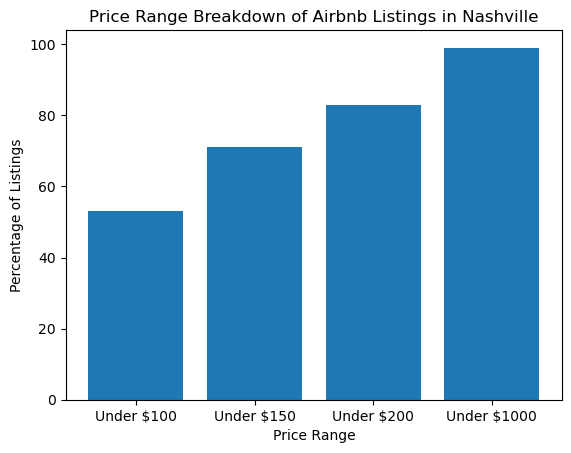

In [520]:
# price range breakdown of airbnb listings in nashville
plt.bar((price_ranges.keys()), list(price_ranges.values()), align='center')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Listings')
plt.title("Price Range Breakdown of Airbnb Listings in Nashville")

In [522]:
neighbourhood_price = listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)
neighbourhood_price

neighbourhood_cleansed
District 34    561.333333
District 20    418.718367
District 23    268.958333
District 11    233.920000
District 25    201.152542
District 17    188.031481
District 35    175.636364
District 3     156.705128
District 18    154.353414
District 10    152.131579
District 4     149.241379
District 32    141.875000
District 2     138.771186
District 14    138.277778
District 24    132.800000
District 30    131.790698
District 5     129.117146
District 33    126.423077
District 22    122.000000
District 28    118.230769
District 27    116.220000
District 13    113.598131
District 29    108.369231
District 7     107.925094
District 21    107.701493
District 12    106.169811
District 8     104.414141
District 1     102.297297
District 26    101.805970
District 19     97.915367
District 6      95.470874
District 9      93.564516
District 15     84.605634
District 31     82.709677
District 16     59.163366
Name: price, dtype: float64

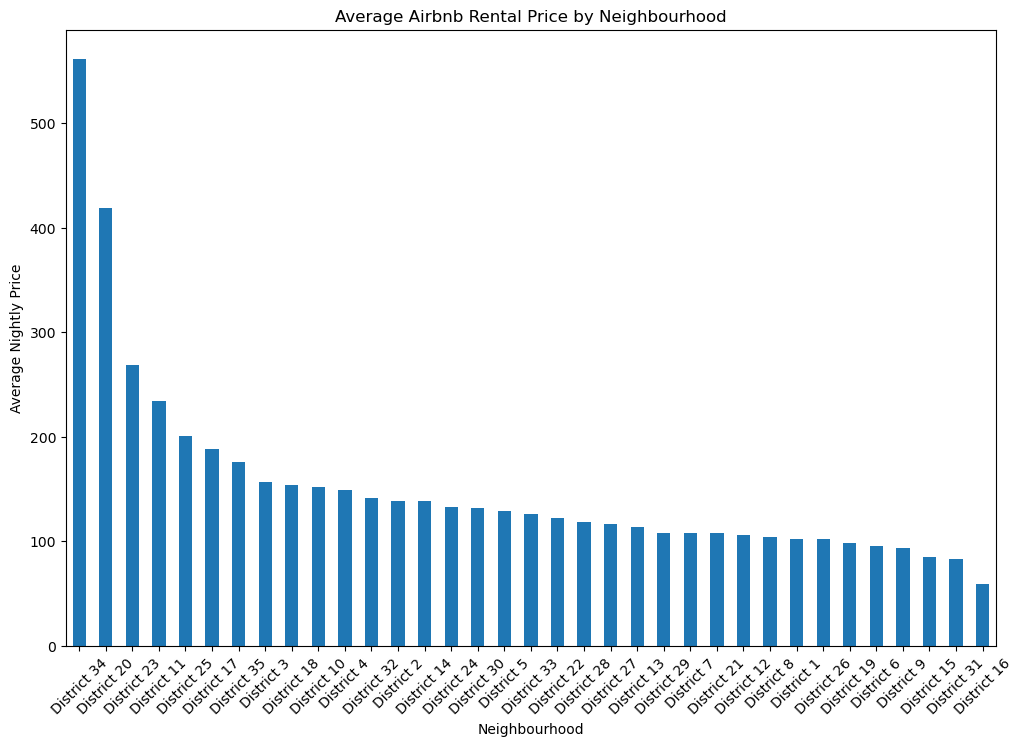

In [524]:
# average nashville nightly airbnb listings price by neighbourhood 
plt.figure(figsize=(12, 8))
neighbourhood_price = listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending = False)
neighbourhood_price.sort_values(ascending = False).plot(kind = 'bar')
#neighbourhood_price.head(10).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Average Airbnb Rental Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Nightly Price')
plt.xticks(rotation=45)

# Show the plot
plt.show()

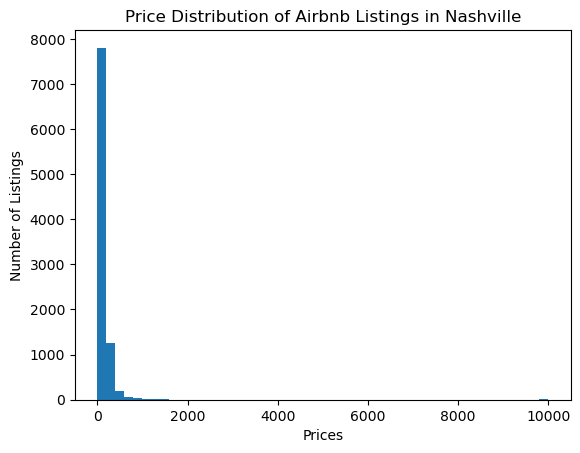

In [526]:
# price distribution of airbnb listings in nashville
plt.hist(data = listings, x = 'price', bins = 50)
plt.xlabel('Prices')
plt.ylabel('Number of Listings')
plt.title("Price Distribution of Airbnb Listings in Nashville");

In [528]:
listings.room_type.value_counts(normalize=True)

room_type
Entire home/apt    0.902615
Private room       0.086434
Hotel room         0.010632
Shared room        0.000319
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Airbnb Listing Types in Nashville, TN')

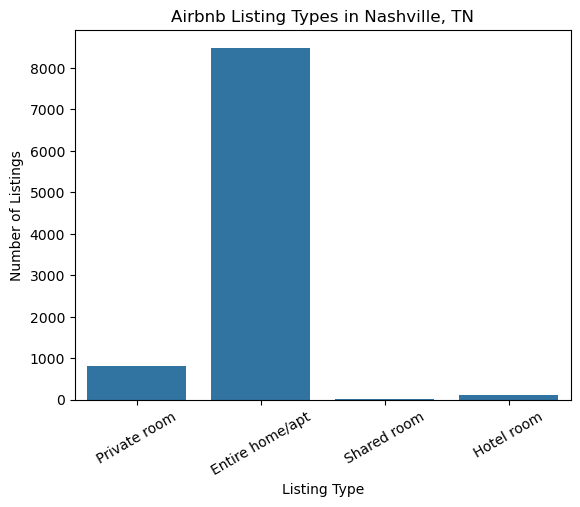

In [530]:
sns.countplot(data=listings,x='room_type')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Airbnb Listing Types in Nashville, TN")

In [532]:
listings['year'] = listings['host_since'].astype(str).str.extract(r'(\d{4})', expand=False)
listings.head(3)

,id,host_id,host_url,host_name,host_since,calculated_host_listings_count,neighbourhood_cleansed,latitude,longitude,price,room_type,minimum_nights,availability_365,accommodates,downtown_distance,airport_distance,year
0,6422,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,1,District 6,36.17143,-86.73570,43,Private room,30,50,1,2.751481,4.636106,2009
1,39870,171184,https://www.airbnb.com/users/show/171184,Evelyn,2010-07-18,1,District 25,36.12466,-86.81269,70,Private room,1,263,2,3.252224,8.061674,2010
2,59576,812128,https://www.airbnb.com/users/show/812128,Patricia And John,2011-07-12,7,District 12,36.18940,-86.59162,43,Private room,30,180,1,10.899691,5.870829,2011


In [535]:
#number of nashville aibnb hosts by year
listings_since_by_year = listings.groupby('year')['host_id'].count().reset_index(name='total count')
listings_since_by_year

,year,total count
0,2009,13
1,2010,66
2,2011,140
3,2012,244
4,2013,490
5,2014,850
6,2015,877
7,2016,1483
8,2017,901
9,2018,634


Text(0.5, 1.0, 'Number of Nashville Aibnb Available Listings by Year')

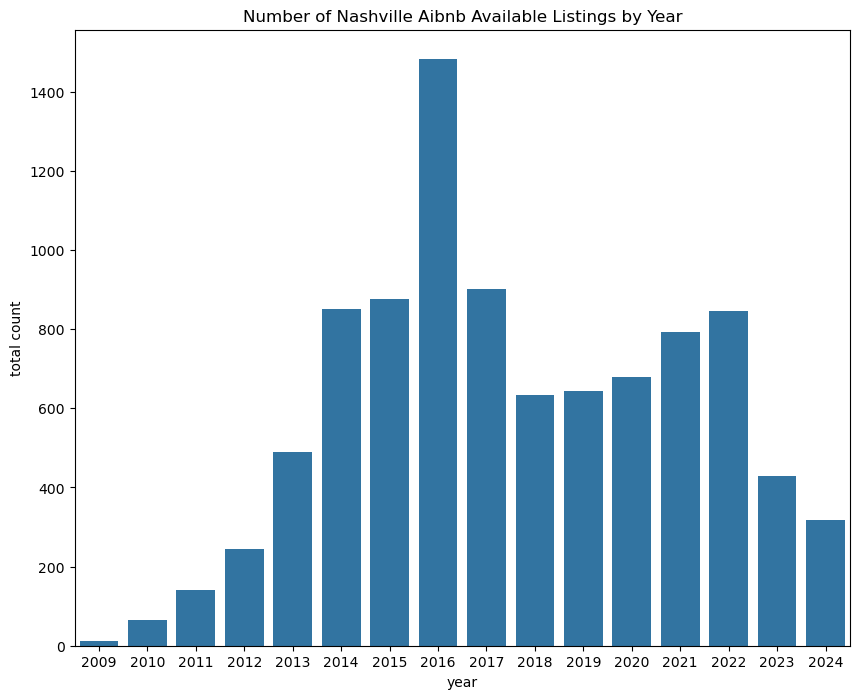

In [537]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='total count',data=listings_since_by_year)
plt.title("Number of Nashville Aibnb Available Listings by Year")

In [615]:
listings_hose_since = (
    listings.set_index('host_since')
    .resample('y')
    .agg({'neighbourhood_cleansed':'count' , 'price':'mean'})
)
listings_hose_since

C:\Users\Praveena\AppData\Local\Temp\ipykernel_23408\2105812377.py:3: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('y')


,neighbourhood_cleansed,price
host_since,,
2009-12-31,13,57.538462
2010-12-31,66,75.560606
2011-12-31,140,130.328571
2012-12-31,244,123.983607
2013-12-31,490,107.924490
2014-12-31,850,137.528235
2015-12-31,877,127.527936
2016-12-31,1483,187.313554
2017-12-31,901,129.437292


In [538]:
# price change in the average listing price of nashville airbnb listings
listings_since_by_year['percentage_change']= listings_since_by_year['total count'].pct_change()*100
listings_since_by_year

,year,total count,percentage_change
0,2009,13,NaN
1,2010,66,407.692308
2,2011,140,112.121212
3,2012,244,74.285714
4,2013,490,100.819672
5,2014,850,73.469388
6,2015,877,3.176471
7,2016,1483,69.099202
8,2017,901,-39.244774
9,2018,634,-29.633740


Text(0.5, 1.0, 'Percentage Change in Number of Nashville Airbnb Rental Listings')

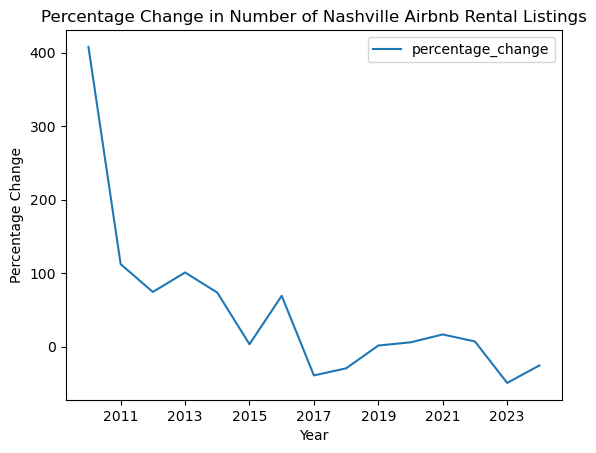

In [541]:
listings_since_by_year.plot(x='year', y='percentage_change', kind='line')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title("Percentage Change in Number of Nashville Airbnb Rental Listings")

In [543]:
# distribution of rental listings availability over 365 days
one_three_months = len(listings[(listings.availability_365 >= 0) & (listings.availability_365 < 90)])
four_six_months = len(listings[(listings.availability_365 >= 90) & (listings.availability_365 < 180)])
seven_nine_months = len(listings[(listings.availability_365 >= 180) & (listings.availability_365 < 270)])
ten_twelve_months = len(listings[(listings.availability_365 >= 270) & (listings.availability_365 <= 365)])

availability = [one_three_months,four_six_months,seven_nine_months,ten_twelve_months]

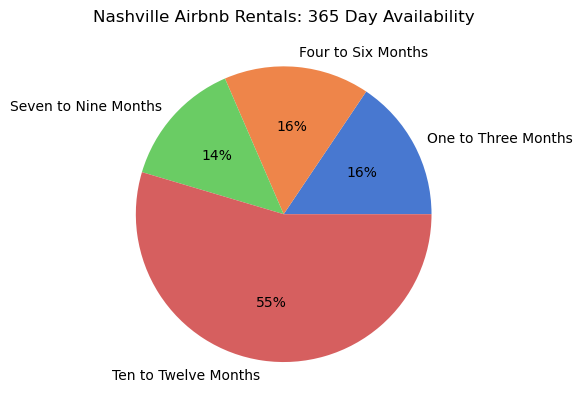

In [545]:
# 365-day Availability Visualization
color = sns.color_palette('muted') 
plt.pie(availability, labels=['One to Three Months','Four to Six Months','Seven to Nine Months','Ten to Twelve Months'], colors=color, autopct='%.0f%%')
plt.title('Nashville Airbnb Rentals: 365 Day Availability')
plt.show() 

In [547]:
#distance of listings from Nashville airport
avg = listings.airport_distance.mean()
round(avg)

7

In [549]:
below_avg = len(listings[listings.airport_distance < avg])
below_avg

5203

In [551]:
above_avg = len(listings[listings.airport_distance > avg])
above_avg

4203

In [553]:
total = below_avg+above_avg
total

9406

In [555]:
with_in_avg_distance = round((below_avg/total)*100,2)
with_in_avg_distance

55.32

In [557]:
away_distance = round((above_avg/total)*100,2)
away_distance

44.68

Text(0.5, 1.0, 'Distribution of Aibnb Listing Distance from the Nashville Airport')

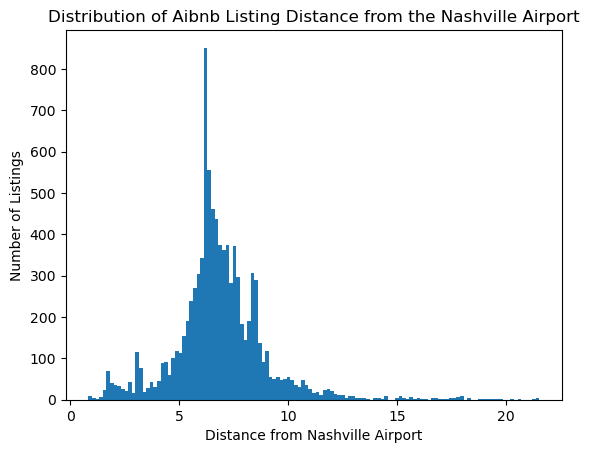

In [559]:
#distribution of listings from nashville airport
plt.hist(data = listings, x = 'airport_distance',bins = 125)
plt.xlabel("Distance from Nashville Airport")
plt.ylabel("Number of Listings")
plt.title("Distribution of Aibnb Listing Distance from the Nashville Airport")


In [561]:
# distance from Nashville Downtown
avg_distance_downtown = listings.downtown_distance.mean()
round(avg_distance_downtown)

3

In [563]:
below_avg_d = len(listings[listings.downtown_distance < avg])
above_avg_d = len(listings[listings.downtown_distance > avg])
total_d = below_avg_d+above_avg_d
total_d

9406

In [565]:
print(f'listings with in average distance {below_avg_d}  and listings above the average distance from downtown {above_avg_d}')

listings with in average distance 8552  and listings above the average distance from downtown 854


In [567]:
listings_below_average = round((below_avg_d/total_d)*100,2)
listings_above_average = round((above_avg_d/total_d)*100,2)

In [569]:
print(f' {listings_below_average} % of listings are with in {round(avg_distance_downtown)} mile radius of thr Nashville downtown and {listings_above_average} % of listings are located beyond {round(avg_distance_downtown)} miles of radius ')

 90.92 % of listings are with in 3 mile radius of thr Nashville downtown and 9.08 % of listings are located beyond 3 miles of radius 


Text(0.5, 1.0, 'Distribution of Aibnb Listing Distance from the Nashville Downtown')

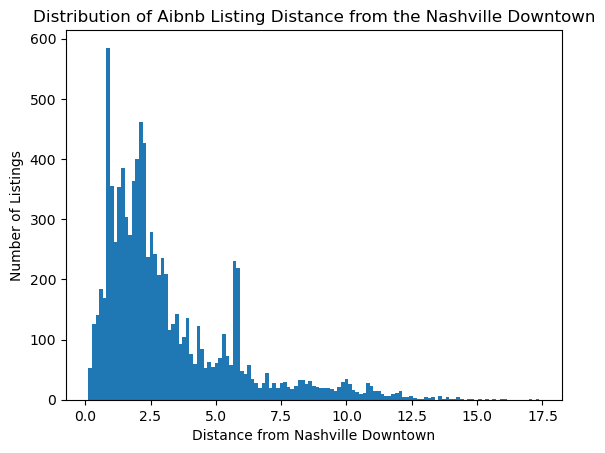

In [571]:
#distribution of listings from nashville downtown
plt.hist(data = listings, x = 'downtown_distance',bins = 125)
plt.xlabel("Distance from Nashville Downtown")
plt.ylabel("Number of Listings")
plt.title("Distribution of Aibnb Listing Distance from the Nashville Downtown")

In [573]:
mean_price = listings.groupby('year')['price'].mean()
median_price = listings.groupby('year')['price'].median()

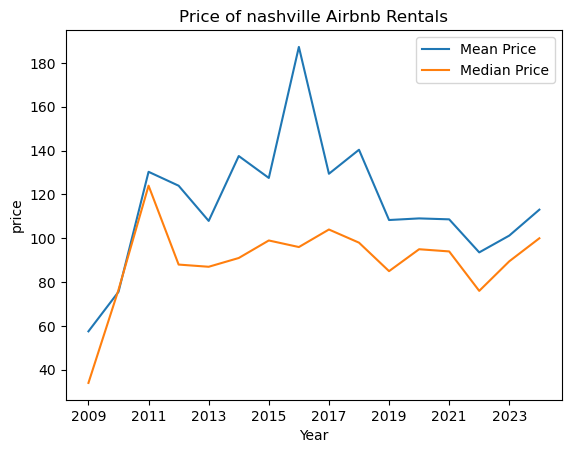

In [575]:
mean_price.plot()
median_price.plot()
plt.xlabel('Year')
plt.ylabel('price')
plt.title('Price of nashville Airbnb Rentals')
plt.legend(['Mean Price','Median Price'])
plt.show()

In [577]:
top = listings[['host_name','calculated_host_listings_count','host_url']].sort_values('calculated_host_listings_count',ascending=False)
#top
HTML(top.head(5).to_html(render_links = True,escape=False))

,host_name,calculated_host_listings_count,host_url
4309,Host Extraordinaires,202,https://www.airbnb.com/users/show/101426897
2210,Host Extraordinaires,202,https://www.airbnb.com/users/show/101426897
665,Host Extraordinaires,202,https://www.airbnb.com/users/show/101426897
664,Host Extraordinaires,202,https://www.airbnb.com/users/show/101426897
8566,Host Extraordinaires,202,https://www.airbnb.com/users/show/101426897


In [750]:
# Top 10 hosts names 
top_host_listings = listings.groupby(['host_name','host_url'])[['calculated_host_listings_count']].count().sort_values('calculated_host_listings_count',ascending = False)
# top_host_listings
top_hosts=HTML(top_host_listings.head(3).to_html(render_links = True,escape=False))
top_hosts

,,calculated_host_listings_count
host_name,host_url,
Host Extraordinaires,https://www.airbnb.com/users/show/101426897,202
AvantStay Nashville,https://www.airbnb.com/users/show/338667310,173
GoodNight,https://www.airbnb.com/users/show/20772148,153


In [581]:
# short term rentals vs lonterm rentals based on 28 days
short_term = len(listings[listings.minimum_nights < 28])
long_term = len(listings[listings.minimum_nights > 28])
rental_type = [short_term, long_term]
print(f"In the Nashville Airbnb just {round((long_term/(long_term+short_term)) * 100 , 2)} % of listings provide long-term rentals . {round((short_term/(long_term+short_term)) * 100, 2)} of listings provide short-term stays.")
print(f"Average Nashville Airbnb listings have a minimum nights booking requirement of {round(listings.minimum_nights.mean())} nights, indicating that an average listing would offer short-term rental options")

In the Nashville Airbnb just 13.86 % of listings provide long-term rentals . 86.14 of listings provide short-term stays.
Average Nashville Airbnb listings have a minimum nights booking requirement of 6 nights, indicating that an average listing would offer short-term rental options


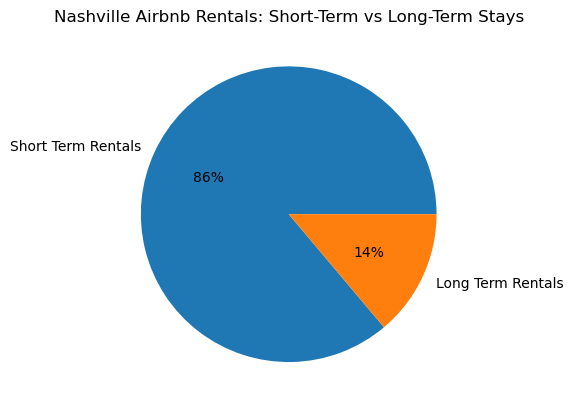

In [583]:
color = sns.color_palette('bright') 
plt.pie(rental_type, labels=['Short Term Rentals','Long Term Rentals'], autopct='%.0f%%')
plt.title('Nashville Airbnb Rentals: Short-Term vs Long-Term Stays')
plt.show()

In [585]:
# listings.to_csv('../data/output_listings_new.csv',index = False)

In [746]:
# permits.to_csv('../data/output_permits_updated.csv',index = False)

In [676]:
listings_neighbourhood.to_csv('../data/listings_neighbourhood_price.csv',index = False)

In [678]:
listings_accommodates.to_csv('../data/listings_accommodates_price.csv',index = False)

In [680]:
listings_hose_since.to_csv('../data/listings_hose_since_price.csv',index = False)